# Changing with The Times:
#### Predicting Gender Bias in Online News Headlines

The structure of this notebook is inspired by Melissa Lee's project "Prediting Media Bias in News Articles", which can found [here](https://github.com/melissaleeyvr/Predicting-Media-Bias-in-News-Articles).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import datetime
from nltk.corpus import stopwords
import gensim
import gensim.downloader
from gensim.utils import simple_preprocess

In [2]:
# Loading 'headlines.csv' into a Pandas DataFrame
headlines = pd.read_csv('Data/headlines.csv')

# Showing first 5 rows of the DataFrame
headlines.head()

index  Unnamed: 0                                                url  \
0      0           0  https://www.iol.co.za/entertainment/movies-the...   
1      1           1  https://www.iol.co.za/entertainment/music/the-...   
2      2           2  https://www.iol.co.za/entertainment/celebrity-...   
3      3           3  https://www.iol.co.za/news/south-africa/wester...   
4      4           4  https://www.iol.co.za/business-report/careers/...   

                                    headline_no_site       site  \
0         'Lady Bird' buzzes through young sexuality  iol.co.za   
1  The shadowy urban POP super Starrah who loves ...  iol.co.za   
2  Rihanna pens heartfelt tribute to her mom in b...  iol.co.za   
3  Shock as woman accused of killing teen girlfri...  iol.co.za   
4  TOP STORY: Meet South Africa's new first lady ...  iol.co.za   

                        time       country      bias  
0  2018-02-23 08:00:00+00:00  South Africa  0.000000  
1  2018-01-10 08:00:00+00:00  South Africa  0.166667  
2  2018-02-21 08:00:00+00:00  South Africa  0.333333  
3  2018-02-27 08:00:00+00:00  South Africa  0.333333  
4  2018-02-15 08:00:00+00:00  South Africa  0.166667

In [3]:
# Dropping irrelevant columns 'url', 'Unnamed: 0', and 'index'
headlines = headlines.drop(columns=['url', 'Unnamed: 0', 'index'])

In [4]:
headlines.shape

(382139, 5)

In [5]:
headlines.describe()

bias
count  382139.000000
mean        0.171057
std         0.101210
min         0.000000
25%         0.166667
50%         0.166667
75%         0.166667
max         1.000000

In [6]:
# Getting value counts for bias feature
headlines['bias'].value_counts()

bias
0.166667    265271
0.000000     57227
0.333333     52629
0.500000      6408
0.666667       568
0.833333        35
1.000000         1
Name: count, dtype: int64

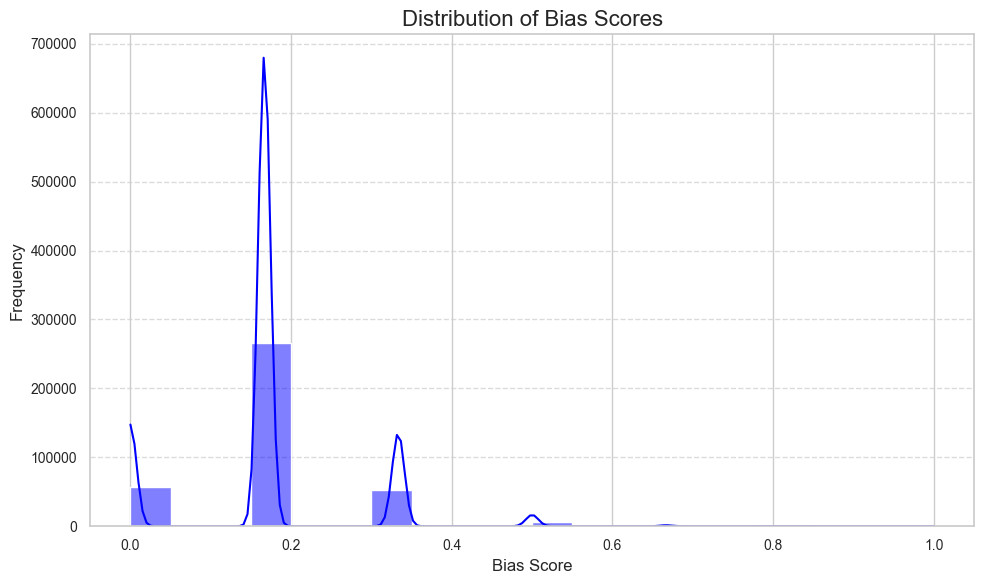

In [7]:
# Plotting bias distribution

# Setting Seaborn style
sns.set(style="whitegrid")

# Plotting histogram of 'bias'
plt.figure(figsize=(10, 6))
sns.histplot(headlines['bias'], bins=20, kde=True, color='blue')

# Styling the plot
plt.title('Distribution of Bias Scores', fontsize=16)
plt.xlabel('Bias Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

In [8]:
# Creating feature 'sentiment_polarity'

# Creating a sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Applying the sentiment analyzer to each headline and storing the compound score - this takes a while to run
headlines['sentiment_polarity'] = headlines['headline_no_site'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [9]:
headlines['sentiment_polarity'].value_counts()

sentiment_polarity
 0.0000    127683
-0.2960      6871
 0.4019      5231
-0.4767      4682
-0.3182      4423
            ...  
 0.6075         1
-0.4690         1
 0.5991         1
 0.7854         1
 0.4388         1
Name: count, Length: 4977, dtype: int64

In [10]:
# Print min and max values for sentiment polarity
print(headlines['sentiment_polarity'].min())
print(headlines['sentiment_polarity'].max())

-0.979
0.9682


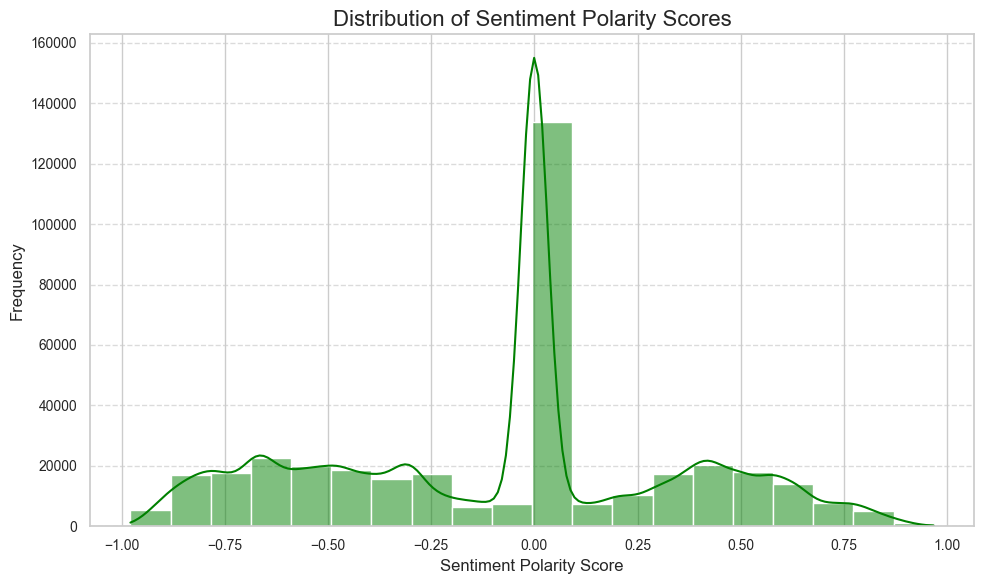

In [11]:
# Plotting dist of sentiment polarity

# Setting Seaborn style
sns.set(style="whitegrid")

# Plotting histogram of 'sentiment_polarity'
plt.figure(figsize=(10, 6))
sns.histplot(headlines['sentiment_polarity'], bins=20, kde=True, color='green')

# Styling the plot
plt.title('Distribution of Sentiment Polarity Scores', fontsize=16)
plt.xlabel('Sentiment Polarity Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Showing the plot
plt.tight_layout()
plt.show()

In [12]:
# Engineering 'Day of the Week' and 'Month' Features
headlines['Day_of_Week'] = pd.to_datetime(headlines['time']).dt.day_name()
headlines['Month'] = pd.to_datetime(headlines['time']).dt.month

# Engineering 'Hour of Dat' feature
headlines['Hour_of_Day'] = pd.to_datetime(headlines['time']).dt.hour

# Converting 'time' column to datetime format
headlines['time'] = pd.to_datetime(headlines['time'], errors='coerce')

# Extracting the year and creating a new 'Publication Year' feature
headlines['Publication_Year'] = headlines['time'].dt.year

In [13]:
# Dropping time column
headlines = headlines.drop(columns=['time'])

In [14]:
# Creating word count feature
headlines['Word_Count'] = headlines['headline_no_site'].apply(lambda x: len(x.split()))

# Creating text length feature
headlines['Text_Length'] = headlines['headline_no_site'].apply(len)

In [15]:
headlines.head()

headline_no_site       site       country  \
0         'Lady Bird' buzzes through young sexuality  iol.co.za  South Africa   
1  The shadowy urban POP super Starrah who loves ...  iol.co.za  South Africa   
2  Rihanna pens heartfelt tribute to her mom in b...  iol.co.za  South Africa   
3  Shock as woman accused of killing teen girlfri...  iol.co.za  South Africa   
4  TOP STORY: Meet South Africa's new first lady ...  iol.co.za  South Africa   

       bias  sentiment_polarity Day_of_Week  Month  Hour_of_Day  \
0  0.000000              0.0000      Friday      2            8   
1  0.166667              0.8225   Wednesday      1            8   
2  0.333333              0.5423   Wednesday      2            8   
3  0.333333             -0.7184     Tuesday      2            8   
4  0.166667              0.3680    Thursday      2            8   

   Publication_Year  Word_Count  Text_Length  
0              2018           6           42  
1              2018          10           57  
2              2018          10           58  
3              2018          11           65  
4              2018          10           62

In [16]:
headlines['site'].value_counts()

site
dailymail.co.uk    8219
telegraph.co.uk    7596
abcnews.go.com     6305
indiatimes.com     6269
mirror.co.uk       6207
                   ... 
news.google.com       4
makeuseof.com         3
howtogeek.com         3
pcadvisor.co.uk       1
dailysun.co.za        1
Name: count, Length: 186, dtype: int64

In [17]:
headlines['country'].value_counts()

country
India           138590
USA             115669
UK              109286
South Africa     18594
Name: count, dtype: int64

In [18]:
# Setting a threshold for news sites with at least 5000 headlines
min_headlines_threshold = 5000
top_sites = headlines['site'].value_counts()
top_sites = top_sites[top_sites >= min_headlines_threshold].index

# Creating a new dataframe with only the sites with at least 5000 headlines
headlines_filtered = headlines[headlines['site'].isin(top_sites)].copy()

In [19]:
headlines_filtered.shape

(117949, 11)

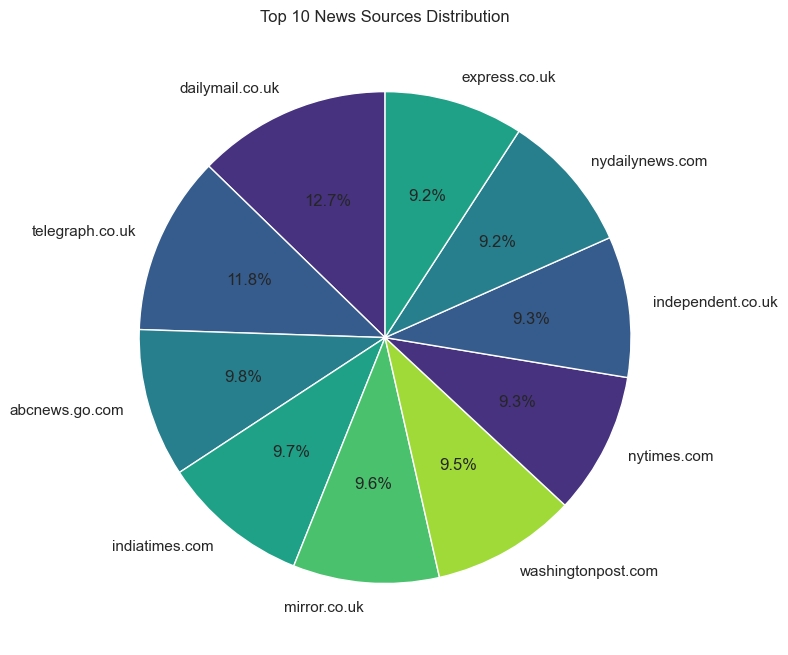

In [20]:
# Getting top 10 sites with most headlines
top_10_sites = headlines_filtered['site'].value_counts().nlargest(10)

# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_sites, labels=top_10_sites.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Top 10 News Sources Distribution')
plt.tight_layout()

# Showing the plot
plt.show()

/var/folders/xl/6sfvtvk54y1982txcc62tyqw0000gn/T/ipykernel_20414/1489788177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=headlines_filtered, palette='viridis')


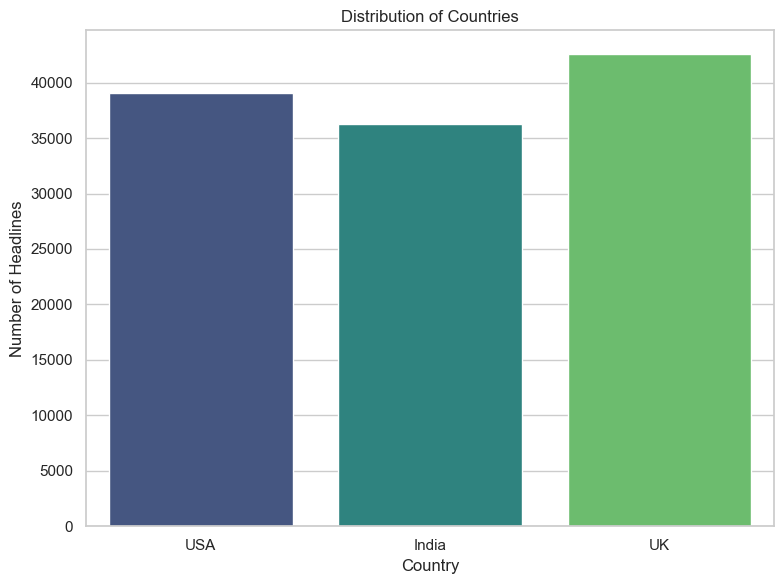

In [21]:
# Getting distribution of countries
plt.figure(figsize=(8, 6))
sns.countplot(x='country', data=headlines_filtered, palette='viridis')
plt.title('Distribution of Countries')
plt.xlabel('Country')
plt.ylabel('Number of Headlines')
plt.tight_layout()

# Showing the plot
plt.show()

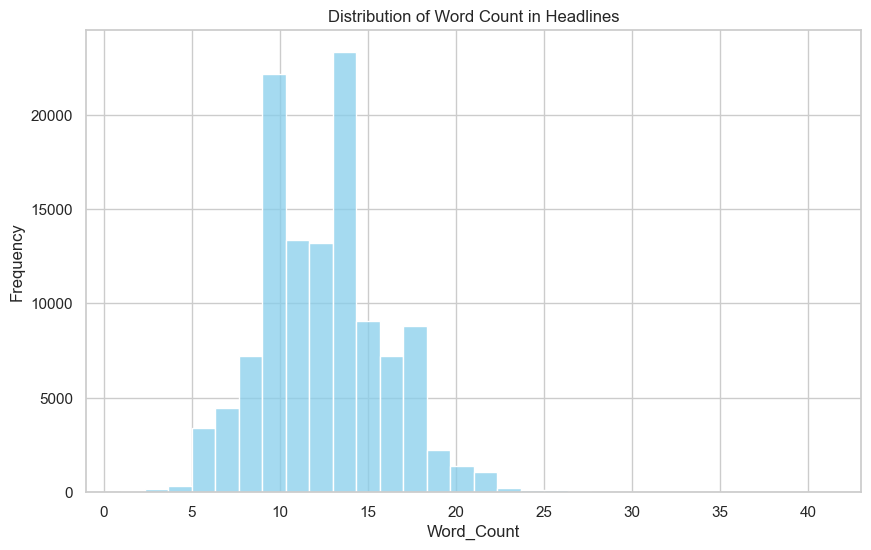

In [22]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(headlines_filtered['Word_Count'], bins=30, color='skyblue', kde=False)
plt.title('Distribution of Word Count in Headlines')
plt.xlabel('Word_Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

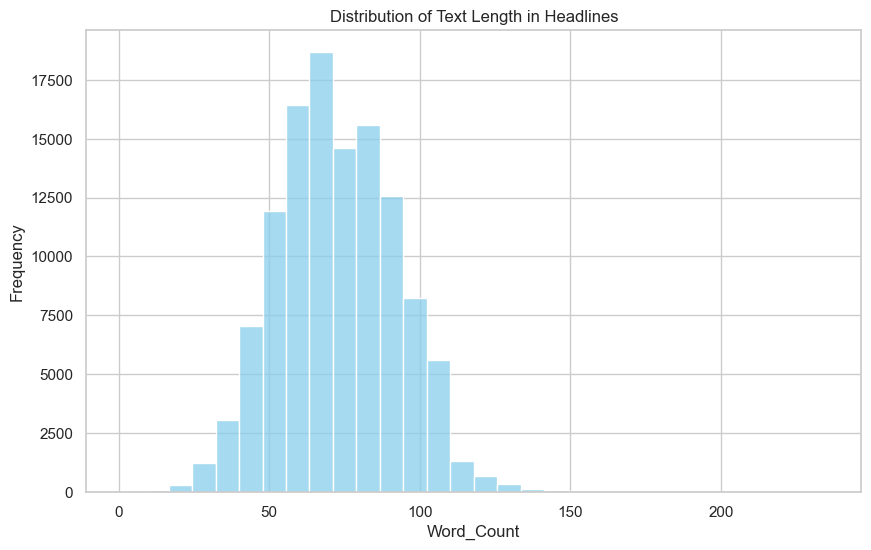

In [23]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(headlines_filtered['Text_Length'], bins=30, color='skyblue', kde=False)
plt.title('Distribution of Text Length in Headlines')
plt.xlabel('Word_Count')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [24]:
headlines_filtered['bias'].value_counts()

bias
0.166667    79211
0.333333    18478
0.000000    17353
0.500000     2629
0.666667      262
0.833333       16
Name: count, dtype: int64

In [25]:
# Setting values to drop
values_to_drop = [0.666667, 0.833333]

# Use boolean indexing to drop rows with specified values in 'bias' column
headlines_filtered = headlines_filtered[~headlines_filtered['bias'].isin(values_to_drop)]

In [26]:
conditions = [
    headlines_filtered['bias'].between(0.000000, 0.000000, inclusive='both'),
    headlines_filtered['bias'].between(0.1, 0.2, inclusive='both'),
    headlines_filtered['bias'].between(0.3, 0.5, inclusive='both'),
]

labels = ['No Bias', 'Low Bias', 'High Bias']

headlines_filtered['bias_category'] = np.select(conditions, labels, default=None)

In [27]:
headlines_filtered['bias_category'].unique()

array(['High Bias', 'Low Bias', 'No Bias', None], dtype=object)

In [28]:
headlines_filtered.head()

headline_no_site            site  \
9207         Mother and Daughter Reunite After 82 Years  abcnews.go.com   
9208  Hayden Panettiere 'Happy' to Stand Up for Wome...  abcnews.go.com   
9209  Woman Gets Trendy Tattoo to 'Caution' People S...  abcnews.go.com   
9210  Timeline of Alleged Abduction and Slaying of 1...  abcnews.go.com   
9211  Unabomber Ted Kaczynski's Brother, Sister in L...  abcnews.go.com   

     country      bias  sentiment_polarity Day_of_Week  Month  Hour_of_Day  \
9207     USA  0.333333              0.0000   Wednesday      2            8   
9208     USA  0.166667             -0.5719     Tuesday      1            8   
9209     USA  0.333333              0.0000    Saturday      2            8   
9210     USA  0.166667             -0.5859   Wednesday      2            8   
9211     USA  0.166667              0.0000   Wednesday      2            8   

      Publication_Year  Word_Count  Text_Length bias_category  
9207              2016           7           42     High Bias  
9208              2016          11           74      Low Bias  
9209              2016          12           66     High Bias  
9210              2016          12           70      Low Bias  
9211              2016          13           77      Low Bias

In [29]:
# Dropping original bias column
headlines_filtered = headlines_filtered.drop(columns=['bias'])

In [30]:
headlines_filtered.isnull().sum()

headline_no_site        0
site                    0
country                 0
sentiment_polarity      0
Day_of_Week             0
Month                   0
Hour_of_Day             0
Publication_Year        0
Word_Count              0
Text_Length             0
bias_category         278
dtype: int64

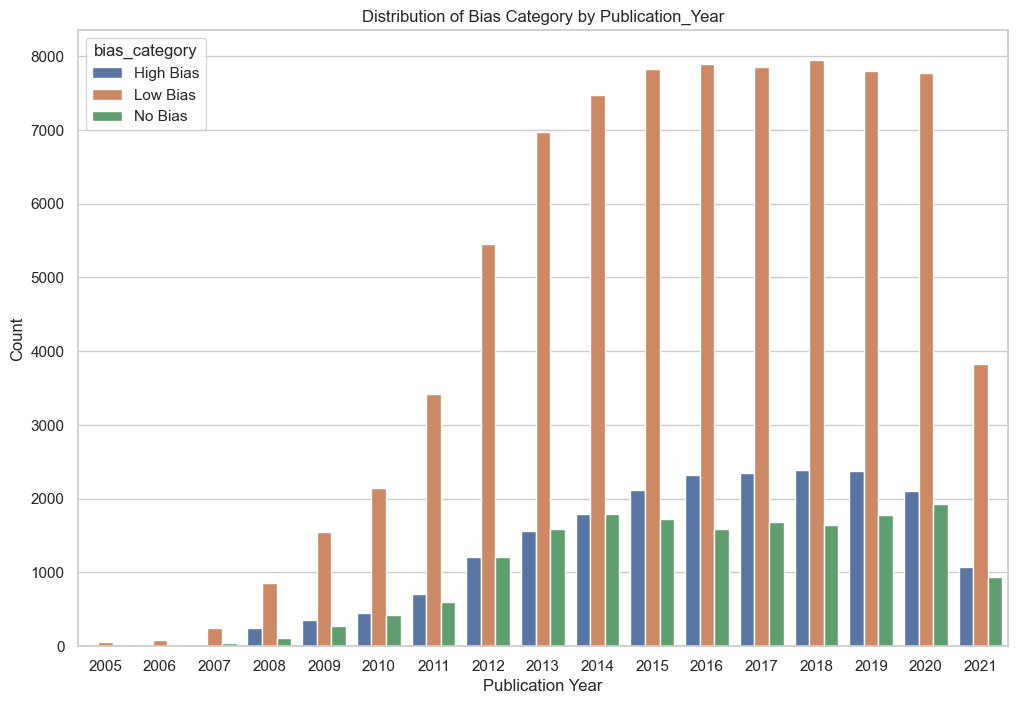

In [31]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting the distribution of bias_category by Publication_Year
plt.figure(figsize=(12, 8))
sns.countplot(x="Publication_Year", hue="bias_category", data=headlines_filtered)
plt.title('Distribution of Bias Category by Publication_Year')
plt.xlabel('Publication Year')
plt.ylabel('Count')

# Show the plot
plt.show()

/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


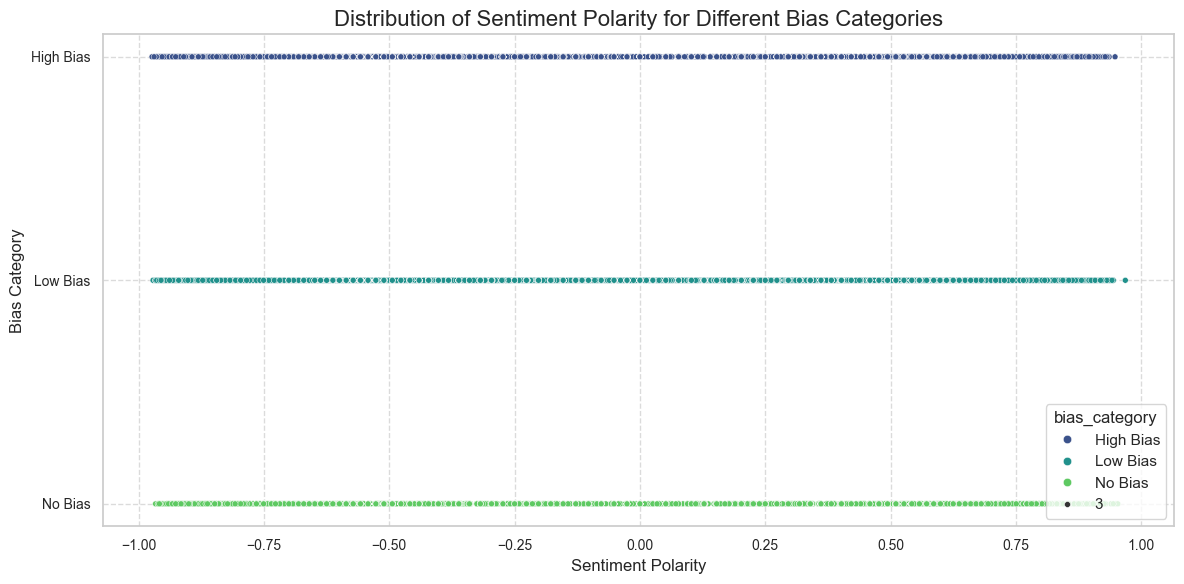

In [32]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Plot a swarm plot for Sentiment_Polarity vs. bias with a gradient color scheme
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(x='sentiment_polarity', y='bias_category', data=headlines_filtered, hue='bias_category', palette='viridis', size=3)

# Style the plot
plt.title('Distribution of Sentiment Polarity for Different Bias Categories', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=12)
plt.ylabel('Bias Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])  # Set an empty array

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
# Select the categorical columns to one-hot encode
categorical_columns = ['site', 'country', 'Day_of_Week', 'Month', 'Hour_of_Day', 'Publication_Year']

# Create one-hot encoded columns with 1s and 0s
one_hot_encoded = pd.get_dummies(headlines_filtered[categorical_columns], drop_first=True, dtype=int)

# Concatenate the one-hot encoded columns with the original DataFrame
headlines_filtered_encoded = pd.concat([headlines_filtered, one_hot_encoded], axis=1)

# Drop the original categorical columns
headlines_filtered_encoded.drop(categorical_columns, axis=1, inplace=True)

# Display the resulting DataFrame
headlines_filtered_encoded.head(1)

headline_no_site  sentiment_polarity  \
9207  Mother and Daughter Reunite After 82 Years                 0.0   

      Word_Count  Text_Length bias_category  site_businessinsider.com  \
9207           7           42     High Bias                         0   

      site_dailymail.co.uk  site_dnaindia.com  site_eonline.com  \
9207                     0                  0                 0   

      site_express.co.uk  ...  site_usmagazine.com  site_washingtonpost.com  \
9207                   0  ...                    0                        0   

      country_UK  country_USA  Day_of_Week_Monday  Day_of_Week_Saturday  \
9207           0            1                   0                     0   

      Day_of_Week_Sunday  Day_of_Week_Thursday  Day_of_Week_Tuesday  \
9207                   0                     0                    0   

      Day_of_Week_Wednesday  
9207                      1  

[1 rows x 32 columns]

In [34]:
# Rename the 'headlines_no_site' column to 'headlines'
headlines_filtered_encoded.rename(columns={'headline_no_site': 'headlines'}, inplace=True)

headlines_filtered_encoded['headlines'].head()

9207           Mother and Daughter Reunite After 82 Years
9208    Hayden Panettiere 'Happy' to Stand Up for Wome...
9209    Woman Gets Trendy Tattoo to 'Caution' People S...
9210    Timeline of Alleged Abduction and Slaying of 1...
9211    Unabomber Ted Kaczynski's Brother, Sister in L...
Name: headlines, dtype: object

In [35]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
import gensim
import gensim.downloader
from gensim.utils import simple_preprocess

In [36]:
# Tokenize, Clean, and Lemmatize Text

# Tokenizing the headline text
headlines_filtered_encoded['tokenized_text'] = headlines_filtered_encoded['headlines'].apply(word_tokenize)

# Removing non-alphabetic characters, handle empty strings, and extra spaces
headlines_filtered_encoded['cleaned_text'] = headlines_filtered_encoded['tokenized_text'].apply(lambda tokens: [re.sub(r'[^a-zA-Z0-9]', '', token).strip() for token in tokens if re.sub(r'[^a-zA-Z0-9]', '', token).strip()])

# Converting to lowercase
headlines_filtered_encoded['cleaned_text'] = headlines_filtered_encoded['cleaned_text'].apply(lambda tokens: [token.lower() for token in tokens])

# Lemmatization - this takes a minute or two to run
lemmatizer = WordNetLemmatizer()
headlines_filtered_encoded['lemmatized_text'] = headlines_filtered_encoded['cleaned_text'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens])

In [37]:
lemmatized_df = headlines_filtered_encoded.copy()

In [38]:
# Drop the 'headlines' column from lemmatized_df
lemmatized_df.drop('headlines', axis=1, inplace=True)

# Display the first few rows of lemmatized_df after dropping the column
lemmatized_df.head(1)

sentiment_polarity  Word_Count  Text_Length bias_category  \
9207                 0.0           7           42     High Bias   

      site_businessinsider.com  site_dailymail.co.uk  site_dnaindia.com  \
9207                         0                     0                  0   

      site_eonline.com  site_express.co.uk  site_forbes.com  ...  country_USA  \
9207                 0                   0                0  ...            1   

      Day_of_Week_Monday  Day_of_Week_Saturday  Day_of_Week_Sunday  \
9207                   0                     0                   0   

      Day_of_Week_Thursday  Day_of_Week_Tuesday  Day_of_Week_Wednesday  \
9207                     0                    0                      1   

                                         tokenized_text  \
9207  [Mother, and, Daughter, Reunite, After, 82, Ye...   

                                           cleaned_text  \
9207  [mother, and, daughter, reunite, after, 82, ye...   

                                        lemmatized_text  
9207  [mother, and, daughter, reunite, after, 82, year]  

[1 rows x 34 columns]

In [39]:
# Getting stop words
stop_words = set(stopwords.words('english'))

# Removing stop words from the lemmatized_text column
lemmatized_df['lemmatized_text_no_stopwords'] = lemmatized_df['lemmatized_text'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

In [40]:
lemmatized_df['lemmatized_text_no_stopwords'].head()

9207                [mother, daughter, reunite, 82, year]
9208    [hayden, panettiere, happy, stand, woman, post...
9209    [woman, get, trendy, tattoo, caution, people, ...
9210    [timeline, alleged, abduction, slaying, 13, ye...
9211    [unabomber, ted, kaczynski, brother, sister, l...
Name: lemmatized_text_no_stopwords, dtype: object

In [41]:
df_to_vectorize = lemmatized_df.copy()

In [42]:
# Setting list of columns to drop
columns_to_drop = ['tokenized_text', 'cleaned_text', 'lemmatized_text']

# Dropping the specified columns
df_to_vectorize.drop(columns=columns_to_drop, inplace=True)

In [43]:
df_to_vectorize.head(1)

sentiment_polarity  Word_Count  Text_Length bias_category  \
9207                 0.0           7           42     High Bias   

      site_businessinsider.com  site_dailymail.co.uk  site_dnaindia.com  \
9207                         0                     0                  0   

      site_eonline.com  site_express.co.uk  site_forbes.com  ...  \
9207                 0                   0                0  ...   

      site_washingtonpost.com  country_UK  country_USA  Day_of_Week_Monday  \
9207                        0           0            1                   0   

      Day_of_Week_Saturday  Day_of_Week_Sunday  Day_of_Week_Thursday  \
9207                     0                   0                     0   

      Day_of_Week_Tuesday  Day_of_Week_Wednesday  \
9207                    0                      1   

               lemmatized_text_no_stopwords  
9207  [mother, daughter, reunite, 82, year]  

[1 rows x 32 columns]

In [44]:
# Printing available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [45]:
# Downloading a pre-trained word embedding model and assigning it to 'model'- this will take a while! 
model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

Let's define a functiton that generate an embedding for the pre-trained text model by mapping the embeddings into a 300-dimensional space. For out-of-vocabulary words, we use a zero-vector replacement, and we'll remove stop words from the text.
Input: text (str): Text to be embedded.
Output: embedding_vector (np.array): Averaged embedding vector in a 300-dimensional space.

In [46]:
def text2vec(text):
    
    tokenized = text
    
    word_embeddings = [np.zeros(300)]
    for word in tokenized:
        if word in model:
            vector = model[word]
        else:
            vector = np.zeros(300)
            
        word_embeddings.append(vector)
    
    text_embedding = np.stack(word_embeddings).mean(axis=0)
    
    return text_embedding

In [47]:
# Applying function over the lemmatized text column and assigning the results to new columns
df_to_vectorize['headline_vectors'] = df_to_vectorize['lemmatized_text_no_stopwords'].apply(lambda x: text2vec(x))

In [48]:
df_to_vectorize['headline_vectors'].head()

9207    [-0.010114432700599233, 0.02315941619842003, 0...
9208    [-0.018402375280857086, -0.012355675251455978,...
9209    [-0.012091000284999608, -0.0066915501840412615...
9210    [-0.005805909133050591, 0.009975600615143776, ...
9211    [-0.01995395952835679, -0.022855930007062854, ...
Name: headline_vectors, dtype: object

In [49]:
# Making copy of df_to_vectorize
final_df = df_to_vectorize.copy()

In [50]:
# Drop the 'lemmatized_text_no_stopwords' column
final_df = final_df.drop('lemmatized_text_no_stopwords', axis=1)

In [51]:
# Checking headlines vectors 
final_df['headline_vectors'][9207]

array([-1.01144327e-02,  2.31594162e-02,  3.38478331e-02, -2.61983400e-03,
        3.62601659e-02, -1.06493332e-02, -2.57916904e-04, -6.91277822e-02,
        3.44547993e-02, -3.27153669e-02,  2.43166648e-03,  2.58481659e-02,
        1.29131333e-02,  2.27498331e-02, -1.53669997e-02,  1.92172999e-02,
        2.11366670e-02, -2.11813335e-02,  1.02198500e-02,  3.86651834e-02,
       -6.10258337e-03, -4.23399964e-03, -5.46613497e-02,  8.27141653e-02,
        4.34007682e-02, -6.78025023e-03, -3.30020006e-03,  5.34819920e-03,
        2.84163666e-02,  1.97139827e-02,  7.35648190e-03,  1.29883364e-03,
       -2.31769999e-02, -4.24127669e-02, -1.95416656e-02, -4.42306713e-03,
       -3.61550009e-02, -4.07092326e-02,  1.79235004e-02, -1.36735667e-02,
       -6.36928327e-03, -4.02288832e-02,  1.82416600e-03, -3.50693002e-02,
        2.19708999e-02,  7.66333348e-02, -1.09447500e-02, -8.70424982e-03,
       -4.63549979e-03,  1.90033337e-02,  2.40958499e-02, -1.86153332e-02,
        6.97495028e-03,  

In [52]:
final_df.isnull().sum()

sentiment_polarity            0
Word_Count                    0
Text_Length                   0
bias_category               278
site_businessinsider.com      0
site_dailymail.co.uk          0
site_dnaindia.com             0
site_eonline.com              0
site_express.co.uk            0
site_forbes.com               0
site_independent.co.uk        0
site_indiatimes.com           0
site_metro.co.uk              0
site_mirror.co.uk             0
site_nydailynews.com          0
site_nypost.com               0
site_nytimes.com              0
site_people.com               0
site_standard.co.uk           0
site_telegraph.co.uk          0
site_usatoday.com             0
site_usmagazine.com           0
site_washingtonpost.com       0
country_UK                    0
country_USA                   0
Day_of_Week_Monday            0
Day_of_Week_Saturday          0
Day_of_Week_Sunday            0
Day_of_Week_Thursday          0
Day_of_Week_Tuesday           0
Day_of_Week_Wednesday         0
headline

In [53]:
final_df = final_df.dropna()

In [54]:
# Ensuring there are no NaN values 
final_df.isnull().sum()

sentiment_polarity          0
Word_Count                  0
Text_Length                 0
bias_category               0
site_businessinsider.com    0
site_dailymail.co.uk        0
site_dnaindia.com           0
site_eonline.com            0
site_express.co.uk          0
site_forbes.com             0
site_independent.co.uk      0
site_indiatimes.com         0
site_metro.co.uk            0
site_mirror.co.uk           0
site_nydailynews.com        0
site_nypost.com             0
site_nytimes.com            0
site_people.com             0
site_standard.co.uk         0
site_telegraph.co.uk        0
site_usatoday.com           0
site_usmagazine.com         0
site_washingtonpost.com     0
country_UK                  0
country_USA                 0
Day_of_Week_Monday          0
Day_of_Week_Saturday        0
Day_of_Week_Sunday          0
Day_of_Week_Thursday        0
Day_of_Week_Tuesday         0
Day_of_Week_Wednesday       0
headline_vectors            0
dtype: int64

In [55]:
# Manually calculating class weights

# Extract the unique classes and their counts from the 'bias_category' column in final_df
classes, counts = np.unique(final_df['bias_category'], return_counts=True)

# Calculate class weights for the 'bias_category' column in final_df
total_samples = len(final_df['bias_category'])
class_weights = total_samples / (len(classes) * counts)

# Create a dictionary mapping class labels to their respective weights
class_weight_dict = dict(zip(classes, class_weights))

# Print the class weights
print('Class Weights:', class_weight_dict)

Class Weights: {'High Bias': 1.8583250422450688, 'Low Bias': 0.49517954156198846, 'No Bias': 2.2603392304884844}


train test split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Setting X and y variables
X = final_df.drop('bias_category', axis=1)
y = final_df['bias_category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (94136, 31)
y_train shape: (94136,)
X_test shape: (23535, 31)
y_test shape: (23535,)


In [58]:
# Ensuring there are no NaN values in y_train
y_train.unique()

array(['Low Bias', 'High Bias', 'No Bias'], dtype=object)

In [59]:
# Ensuring there are no NaN values in y_test
y_test.unique()

array(['Low Bias', 'No Bias', 'High Bias'], dtype=object)

In [60]:
# Converting X_train vectors to arrays
X_train_array = np.array(X_train['headline_vectors'].tolist())

# Converting X_test vectors to arrays
X_test_array = np.array(X_test['headline_vectors'].tolist())

## Simple Models

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [62]:
# Create an instance of LogisticRegression with class weights
logreg_model = LogisticRegression(max_iter=1000, random_state=42, class_weight=class_weight_dict)

# Fit the model on the training data
logreg_model.fit(X_train_array, y_train)

# Make predictions on the test data
y_pred_lr = logreg_model.predict(X_test_array)

In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

   High Bias       0.37      0.63      0.47      4281
    Low Bias       0.80      0.44      0.57     15792
     No Bias       0.27      0.59      0.37      3462

    accuracy                           0.50     23535
   macro avg       0.48      0.55      0.47     23535
weighted avg       0.64      0.50      0.52     23535



finding best params

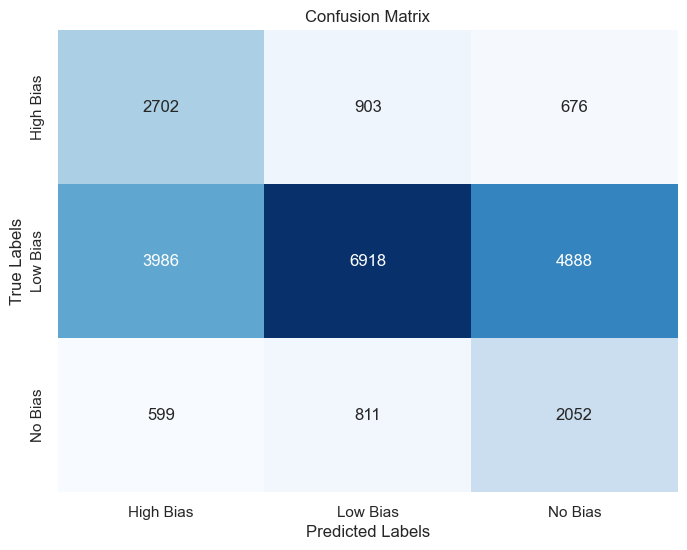

In [64]:
from sklearn.metrics import confusion_matrix

# Get unique classes from y_test
unique_classes = np.unique(y_test)

# Calculate the confusion matrix
logreg_cm = confusion_matrix(y_test, y_pred_lr, labels=unique_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [65]:
logreg_cm

array([[2702,  903,  676],
       [3986, 6918, 4888],
       [ 599,  811, 2052]])

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

# Train the model on the training data
rf_model.fit(X_train_array, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_array)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

   High Bias       0.71      0.06      0.12      4281
    Low Bias       0.68      0.99      0.81     15792
     No Bias       0.76      0.01      0.01      3462

    accuracy                           0.68     23535
   macro avg       0.72      0.35      0.31     23535
weighted avg       0.70      0.68      0.56     23535



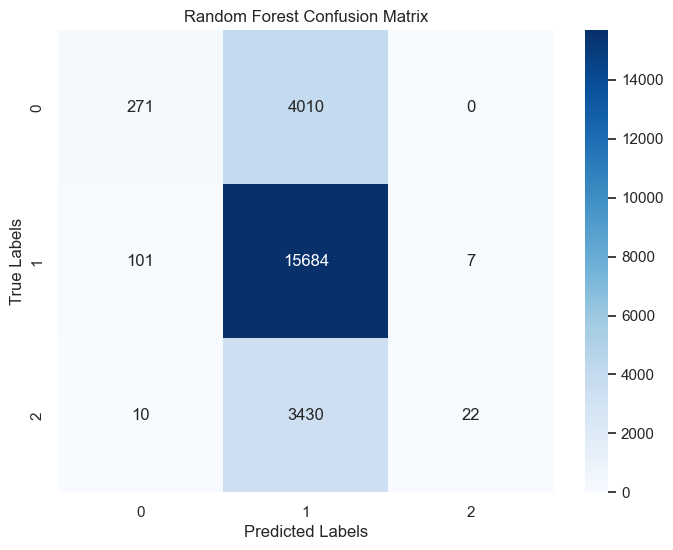

In [68]:
# Create the confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Complex Models

### Neural Network

In [69]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.layers import BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam

2023-11-27 01:37:23.681222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Assuming y_train is a pandas Series with string labels
label_encoder = LabelEncoder()

# Encoding y_test and y_train
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encoding y_train_encoded and y_test_encoded
y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

# Assuming y_train_encoded is an array of class labels
class_labels = np.unique(y_train_encoded)

# Compute class weights for the neural network
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train_encoded)
class_weight_dict = dict(enumerate(class_weights))

In [70]:
# Define the neural network model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train_array.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
nn_model.fit(X_train_array, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/10
2354/2354 [==============================] - 7s 2ms/step - loss: 0.9618 - accuracy: 0.4577 - val_loss: 0.9452 - val_accuracy: 0.5199
Epoch 2/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.9062 - accuracy: 0.5060 - val_loss: 0.9379 - val_accuracy: 0.5197
Epoch 3/10
2354/2354 [==============================] - 6s 3ms/step - loss: 0.8864 - accuracy: 0.5144 - val_loss: 0.8905 - val_accuracy: 0.5586
Epoch 4/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.8688 - accuracy: 0.5255 - val_loss: 0.9078 - val_accuracy: 0.5334
Epoch 5/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.8547 - accuracy: 0.5334 - val_loss: 0.9093 - val_accuracy: 0.5347
Epoch 6/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.8420 - accuracy: 0.5443 - val_loss: 0.9429 - val_accuracy: 0.5219
Epoch 7/10
2354/2354 [==============================] - 6s 2ms/step - loss: 0.8302 - accuracy: 0.5494 - val_loss: 0.8973 - val_accuracy:

In [71]:
# Inspect the mapping between original class labels and encoded numbers
class_labels_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Labels Mapping:", class_labels_mapping)

Class Labels Mapping: {'High Bias': 0, 'Low Bias': 1, 'No Bias': 2}


In [72]:
# Make predictions on the test data
nn_model_y_pred_one_hot = nn_model.predict(X_test_array)

# Convert the predicted probabilities to class labels
nn_model_y_pred_classes = np.argmax(nn_model_y_pred_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_encoded, nn_model_y_pred_classes, target_names=label_encoder.classes_))

736/736 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   High Bias       0.37      0.74      0.50      4281
    Low Bias       0.82      0.47      0.60     15792
     No Bias       0.33      0.56      0.41      3462

    accuracy                           0.53     23535
   macro avg       0.51      0.59      0.50     23535
weighted avg       0.67      0.53      0.55     23535



neural net with dropout rate to prevent overfitting

In [73]:
# Define the neural network model
nn_model_2 = Sequential()
nn_model_2.add(Dense(64, input_dim=X_train_array.shape[1], activation='relu'))
nn_model_2.add(Dropout(0.5))  # Adding dropout rate of 0.5
nn_model_2.add(Dense(32, activation='relu'))
nn_model_2.add(Dropout(0.5))  # Adding dropout rate of 0.5
nn_model_2.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights
nn_model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
nn_model_2.fit(X_train_array, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/10
2354/2354 [==============================] - 6s 2ms/step - loss: 1.0235 - accuracy: 0.4103 - val_loss: 0.9604 - val_accuracy: 0.4991
Epoch 2/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.9653 - accuracy: 0.4489 - val_loss: 0.9498 - val_accuracy: 0.5220
Epoch 3/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.9493 - accuracy: 0.4619 - val_loss: 0.9592 - val_accuracy: 0.4729
Epoch 4/10
2354/2354 [==============================] - 8s 3ms/step - loss: 0.9397 - accuracy: 0.4653 - val_loss: 0.9811 - val_accuracy: 0.4629
Epoch 5/10
2354/2354 [==============================] - 6s 3ms/step - loss: 0.9349 - accuracy: 0.4733 - val_loss: 0.9520 - val_accuracy: 0.4972
Epoch 6/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.9293 - accuracy: 0.4707 - val_loss: 0.9487 - val_accuracy: 0.4876
Epoch 7/10
2354/2354 [==============================] - 6s 2ms/step - loss: 0.9252 - accuracy: 0.4705 - val_loss: 0.9442 - val_accuracy:

In [74]:
# Make predictions on the test data
nn_model_2_y_pred_one_hot = nn_model_2.predict(X_test_array)

# Convert the predicted probabilities to class labels
nn_model_2_y_pred_classes = np.argmax(nn_model_2_y_pred_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_encoded, nn_model_2_y_pred_classes, target_names=label_encoder.classes_))

736/736 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

   High Bias       0.36      0.70      0.48      4281
    Low Bias       0.83      0.38      0.52     15792
     No Bias       0.28      0.65      0.40      3462

    accuracy                           0.48     23535
   macro avg       0.49      0.58      0.47     23535
weighted avg       0.66      0.48      0.50     23535



neural network with l2 regularization

In [75]:
from tensorflow.keras.regularizers import l2

# Define the simple neural network model
nn_model_3 = Sequential()
nn_model_3.add(Dense(64, input_dim=X_train_array.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
nn_model_3.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
nn_model_3.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights
nn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
nn_model_3.fit(X_train_array, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)

Epoch 1/10
2354/2354 [==============================] - 8s 3ms/step - loss: 1.1305 - accuracy: 0.2863 - val_loss: 1.0988 - val_accuracy: 0.1768
Epoch 2/10
2354/2354 [==============================] - 6s 3ms/step - loss: 1.0993 - accuracy: 0.3002 - val_loss: 1.0968 - val_accuracy: 0.1768
Epoch 3/10
2354/2354 [==============================] - 5s 2ms/step - loss: 1.0993 - accuracy: 0.3646 - val_loss: 1.1037 - val_accuracy: 0.1768
Epoch 4/10
2354/2354 [==============================] - 5s 2ms/step - loss: 1.0993 - accuracy: 0.2502 - val_loss: 1.1038 - val_accuracy: 0.1479
Epoch 5/10
2354/2354 [==============================] - 6s 2ms/step - loss: 1.0993 - accuracy: 0.2695 - val_loss: 1.0939 - val_accuracy: 0.6753
Epoch 6/10
2354/2354 [==============================] - 7s 3ms/step - loss: 1.0993 - accuracy: 0.3821 - val_loss: 1.0985 - val_accuracy: 0.1479
Epoch 7/10
2354/2354 [==============================] - 6s 2ms/step - loss: 1.0993 - accuracy: 0.2785 - val_loss: 1.0942 - val_accuracy:

In [76]:
# Make predictions on the test data
nn_model_3_y_pred_one_hot = nn_model_3.predict(X_test_array)

# Convert the predicted probabilities to class labels
nn_model_3_y_pred_classes = np.argmax(nn_model_3_y_pred_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_encoded, nn_model_3_y_pred_classes, target_names=label_encoder.classes_))

736/736 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   High Bias       0.00      0.00      0.00      4281
    Low Bias       0.67      1.00      0.80     15792
     No Bias       0.00      0.00      0.00      3462

    accuracy                           0.67     23535
   macro avg       0.22      0.33      0.27     23535
weighted avg       0.45      0.67      0.54     23535



/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


add conf matrix here

neural network with batch normalizatiton

In [77]:
# Define the neural network model
nn_model_4 = Sequential()
nn_model_4.add(Dense(64, input_dim=X_train_array.shape[1], activation='relu'))
nn_model_4.add(BatchNormalization())
nn_model_4.add(Dense(32, activation='relu'))
nn_model_4.add(BatchNormalization())
nn_model_4.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights
nn_model_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
nn_model_4.fit(X_train_array, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)


Epoch 1/10
2354/2354 [==============================] - 10s 4ms/step - loss: 0.9735 - accuracy: 0.4571 - val_loss: 0.9936 - val_accuracy: 0.4584
Epoch 2/10
2354/2354 [==============================] - 9s 4ms/step - loss: 0.9082 - accuracy: 0.5019 - val_loss: 0.9001 - val_accuracy: 0.5554
Epoch 3/10
2354/2354 [==============================] - 8s 3ms/step - loss: 0.8857 - accuracy: 0.5149 - val_loss: 0.9352 - val_accuracy: 0.5191
Epoch 4/10
2354/2354 [==============================] - 6s 3ms/step - loss: 0.8704 - accuracy: 0.5263 - val_loss: 0.9124 - val_accuracy: 0.5393
Epoch 5/10
2354/2354 [==============================] - 5s 2ms/step - loss: 0.8578 - accuracy: 0.5324 - val_loss: 0.9499 - val_accuracy: 0.5153
Epoch 6/10
2354/2354 [==============================] - 6s 2ms/step - loss: 0.8443 - accuracy: 0.5402 - val_loss: 0.9382 - val_accuracy: 0.5152
Epoch 7/10
2354/2354 [==============================] - 6s 2ms/step - loss: 0.8375 - accuracy: 0.5456 - val_loss: 0.9302 - val_accuracy

In [78]:
# Make predictions on the test data
nn_model_4_y_pred_one_hot = nn_model_4.predict(X_test_array)

# Convert the predicted probabilities to class labels
nn_model_4_y_pred_classes = np.argmax(nn_model_4_y_pred_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_encoded, nn_model_4_y_pred_classes, target_names=label_encoder.classes_))

736/736 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   High Bias       0.37      0.71      0.49      4281
    Low Bias       0.81      0.50      0.61     15792
     No Bias       0.32      0.53      0.40      3462

    accuracy                           0.54     23535
   macro avg       0.50      0.58      0.50     23535
weighted avg       0.66      0.54      0.56     23535



In [79]:
# Define the neural network model
nn_model_5 = Sequential()
nn_model_5.add(Dense(64, input_dim=X_train_array.shape[1]))
nn_model_5.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
nn_model_5.add(BatchNormalization())
nn_model_5.add(Dense(32))
nn_model_5.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
nn_model_5.add(BatchNormalization())
nn_model_5.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights
nn_model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
nn_model_5.fit(X_train_array, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)


Epoch 1/10
2354/2354 [==============================] - 8s 3ms/step - loss: 0.9657 - accuracy: 0.4703 - val_loss: 1.1228 - val_accuracy: 0.3638
Epoch 2/10
2354/2354 [==============================] - 8s 3ms/step - loss: 0.9076 - accuracy: 0.4989 - val_loss: 0.9441 - val_accuracy: 0.5078
Epoch 3/10
2354/2354 [==============================] - 7s 3ms/step - loss: 0.8894 - accuracy: 0.5136 - val_loss: 0.9562 - val_accuracy: 0.5074
Epoch 4/10
2354/2354 [==============================] - 7s 3ms/step - loss: 0.8757 - accuracy: 0.5235 - val_loss: 0.9288 - val_accuracy: 0.5246
Epoch 5/10
2354/2354 [==============================] - 10s 4ms/step - loss: 0.8629 - accuracy: 0.5295 - val_loss: 0.9338 - val_accuracy: 0.5180
Epoch 6/10
2354/2354 [==============================] - 13s 5ms/step - loss: 0.8532 - accuracy: 0.5378 - val_loss: 0.9745 - val_accuracy: 0.4973
Epoch 7/10
2354/2354 [==============================] - 11s 5ms/step - loss: 0.8430 - accuracy: 0.5422 - val_loss: 0.9234 - val_accura

In [80]:
# Make predictions on the test data
nn_model_5_y_pred_one_hot = nn_model_5.predict(X_test_array)

# Convert the predicted probabilities to class labels
nn_model_5_y_pred_classes = np.argmax(nn_model_5_y_pred_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_encoded, nn_model_5_y_pred_classes, target_names=label_encoder.classes_))

736/736 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

   High Bias       0.38      0.70      0.50      4281
    Low Bias       0.82      0.48      0.60     15792
     No Bias       0.32      0.60      0.42      3462

    accuracy                           0.54     23535
   macro avg       0.51      0.59      0.50     23535
weighted avg       0.67      0.54      0.56     23535



lowering learning rate, adding epochs to 50

In [81]:
# Define the neural network model
nn_model_6 = Sequential()
nn_model_6.add(Dense(64, input_dim=X_train_array.shape[1]))
nn_model_6.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
nn_model_6.add(BatchNormalization())
nn_model_6.add(Dense(32))
nn_model_6.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
nn_model_6.add(BatchNormalization())
nn_model_6.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with a faster learning rate
nn_model_6.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with class weights
nn_model_6.fit(X_train_array, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2, class_weight=class_weight_dict)


Epoch 1/50
2354/2354 [==============================] - 11s 3ms/step - loss: 0.9594 - accuracy: 0.4678 - val_loss: 0.8382 - val_accuracy: 0.6410
Epoch 2/50
2354/2354 [==============================] - 6s 3ms/step - loss: 0.9272 - accuracy: 0.4884 - val_loss: 0.9856 - val_accuracy: 0.4453
Epoch 3/50
2354/2354 [==============================] - 6s 2ms/step - loss: 0.9144 - accuracy: 0.4974 - val_loss: 0.9465 - val_accuracy: 0.5166
Epoch 4/50
2354/2354 [==============================] - 7s 3ms/step - loss: 0.9079 - accuracy: 0.5014 - val_loss: 0.9827 - val_accuracy: 0.4980
Epoch 5/50
2354/2354 [==============================] - 9s 4ms/step - loss: 0.9027 - accuracy: 0.5040 - val_loss: 1.0499 - val_accuracy: 0.4035
Epoch 6/50
2354/2354 [==============================] - 8s 4ms/step - loss: 0.8978 - accuracy: 0.5025 - val_loss: 0.9520 - val_accuracy: 0.5115
Epoch 7/50
2354/2354 [==============================] - 8s 3ms/step - loss: 0.8912 - accuracy: 0.5085 - val_loss: 0.9384 - val_accuracy

In [82]:
# Make predictions on the test data
nn_model_6_y_pred_one_hot = nn_model_6.predict(X_test_array)

# Convert the predicted probabilities to class labels
nn_model_6_y_pred_classes = np.argmax(nn_model_6_y_pred_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_encoded, nn_model_6_y_pred_classes, target_names=label_encoder.classes_))

736/736 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

   High Bias       0.38      0.68      0.49      4281
    Low Bias       0.81      0.48      0.61     15792
     No Bias       0.31      0.59      0.41      3462

    accuracy                           0.53     23535
   macro avg       0.50      0.58      0.50     23535
weighted avg       0.66      0.53      0.56     23535



## Recurrent Neural Networks

### GRU

In [83]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler

In [84]:
# Reshape the input data for GRU (assuming X_train_array has shape (samples, features))
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

# Define the GRU model with Batch Normalization and Dropout
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(X_train_array.shape[1], 1), activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.5))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(BatchNormalization())
gru_model.add(Dropout(0.5))
gru_model.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True) #setting patience to 1

def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Train the GRU model with class weights, lowering epochs, increasing batch size
gru_model.fit(X_train_reshaped, y_train_one_hot, epochs=5, batch_size=250, validation_split=0.2, class_weight=class_weight_dict, callbacks=[early_stopping, learning_rate_scheduler])

Epoch 1/5
302/302 [==============================] - 134s 436ms/step - loss: 1.1145 - accuracy: 0.3146 - val_loss: 1.1010 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 2/5
302/302 [==============================] - 139s 460ms/step - loss: 1.0988 - accuracy: 0.2695 - val_loss: 1.0900 - val_accuracy: 0.6566 - lr: 9.0000e-04
Epoch 3/5
302/302 [==============================] - 141s 467ms/step - loss: 1.0984 - accuracy: 0.2729 - val_loss: 1.0858 - val_accuracy: 0.3481 - lr: 8.1000e-04
Epoch 4/5
302/302 [==============================] - 119s 393ms/step - loss: 1.0984 - accuracy: 0.2613 - val_loss: 1.0918 - val_accuracy: 0.1785 - lr: 7.2900e-04


In [85]:
# Make predictions on the test data
y_pred_one_hot_gru = gru_model.predict(X_test_reshaped)

# Convert the predicted probabilities to class labels
y_pred_classes_gru = np.argmax(y_pred_one_hot_gru, axis=1)

# Convert true labels to class labels
y_test_classes_gru = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_classes_gru, y_pred_classes_gru, target_names=label_encoder.classes_))


736/736 [==============================] - 18s 25ms/step
              precision    recall  f1-score   support

   High Bias       0.20      0.07      0.11      4281
    Low Bias       0.66      0.38      0.48     15792
     No Bias       0.15      0.57      0.24      3462

    accuracy                           0.35     23535
   macro avg       0.34      0.34      0.28     23535
weighted avg       0.50      0.35      0.38     23535



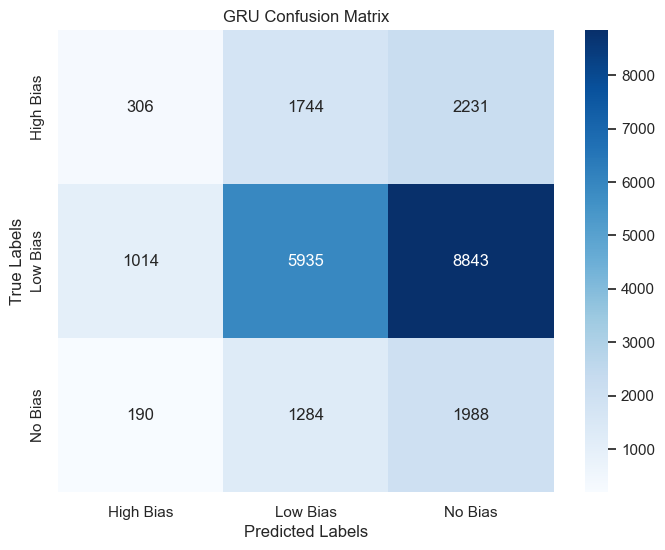

In [86]:
# Generate confusion matrix
gru_cm = confusion_matrix(y_test_classes_gru, y_pred_classes_gru)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gru_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('GRU Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### LSTM

In [87]:
from tensorflow.keras.layers import LSTM

# Define the neural network model with LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_array.shape[1], 1), activation='relu'))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights and a faster learning rate
lstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape the input data for RNN (assuming X_train_array has shape (samples, features))
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))

# Train the RNN model with class weights
lstm_model.fit(X_train_reshaped, y_train_one_hot, epochs=5, batch_size=250, validation_split=0.2, class_weight=class_weight_dict, callbacks=[early_stopping, learning_rate_scheduler])

Epoch 1/5
302/302 [==============================] - 172s 563ms/step - loss: 1.1035 - accuracy: 0.2937 - val_loss: 1.0955 - val_accuracy: 0.1479 - lr: 0.0010
Epoch 2/5
302/302 [==============================] - 137s 455ms/step - loss: 1.0993 - accuracy: 0.2666 - val_loss: 1.1078 - val_accuracy: 0.1495 - lr: 9.0000e-04


In [92]:


# Make predictions on the test data
lstm_model_y_pred_one_hot = lstm_model.predict(X_test_reshaped)

# Convert the predicted probabilities to class labels
lstm_model_y_pred_classes = np.argmax(lstm_model_y_pred_one_hot, axis=1)

# Convert true labels to class labels
lstm_model_y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print(classification_report(lstm_model_y_test_classes, lstm_model_y_pred_classes, target_names=label_encoder.classes_))


736/736 [==============================] - 24s 32ms/step
              precision    recall  f1-score   support

   High Bias       0.00      0.00      0.00      4281
    Low Bias       0.00      0.00      0.00     15792
     No Bias       0.15      1.00      0.26      3462

    accuracy                           0.15     23535
   macro avg       0.05      0.33      0.09     23535
weighted avg       0.02      0.15      0.04     23535



/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


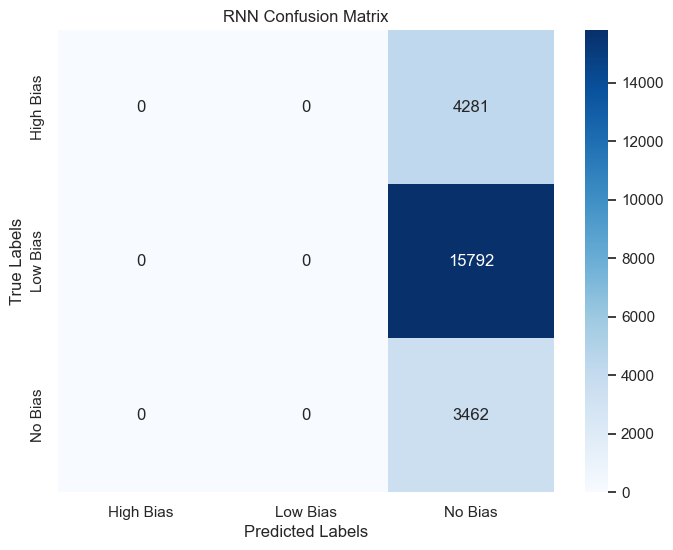

In [93]:
# Calculate confusion matrix
lstm_cm = confusion_matrix(lstm_model_y_test_classes, lstm_model_y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Bidirectional LSTM

In [94]:
from tensorflow.keras.layers import Bidirectional

# Define the Bidirectional LSTM model
blstm_model = Sequential()
blstm_model.add(Bidirectional(LSTM(64, activation='relu'), input_shape=(X_train_array.shape[1], 1)))
blstm_model.add(BatchNormalization())
blstm_model.add(Dropout(0.5))
blstm_model.add(Dense(32, activation='relu'))
blstm_model.add(BatchNormalization())
blstm_model.add(Dropout(0.5))
blstm_model.add(Dense(len(class_labels), activation='softmax'))

# Compile the model learning rate
blstm_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Bidirectional LSTM model with class weights
blstm_model.fit(X_train_reshaped, y_train_one_hot, epochs=5, batch_size=250, validation_split=0.2, class_weight=class_weight_dict, callbacks=[early_stopping, learning_rate_scheduler])


Epoch 1/5
302/302 [==============================] - 217s 707ms/step - loss: 1.1018 - accuracy: 0.3728 - val_loss: 1.1013 - val_accuracy: 0.1768 - lr: 0.0010
Epoch 2/5
302/302 [==============================] - 206s 681ms/step - loss: 1.0963 - accuracy: 0.3437 - val_loss: 1.1077 - val_accuracy: 0.1846 - lr: 9.0000e-04


In [95]:
# Make predictions on the test data
blstm_model_y_pred_one_hot = blstm_model.predict(X_test_reshaped)

# Convert the predicted probabilities to class labels
blstm_y_pred_classes = np.argmax(blstm_model_y_pred_one_hot, axis=1)

# Convert true labels to class labels
blstm_model_y_test_classes = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print(classification_report(blstm_model_y_test_classes, blstm_y_pred_classes, target_names=label_encoder.classes_))

736/736 [==============================] - 28s 37ms/step
              precision    recall  f1-score   support

   High Bias       0.18      1.00      0.31      4281
    Low Bias       0.00      0.00      0.00     15792
     No Bias       0.00      0.00      0.00      3462

    accuracy                           0.18     23535
   macro avg       0.06      0.33      0.10     23535
weighted avg       0.03      0.18      0.06     23535



/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


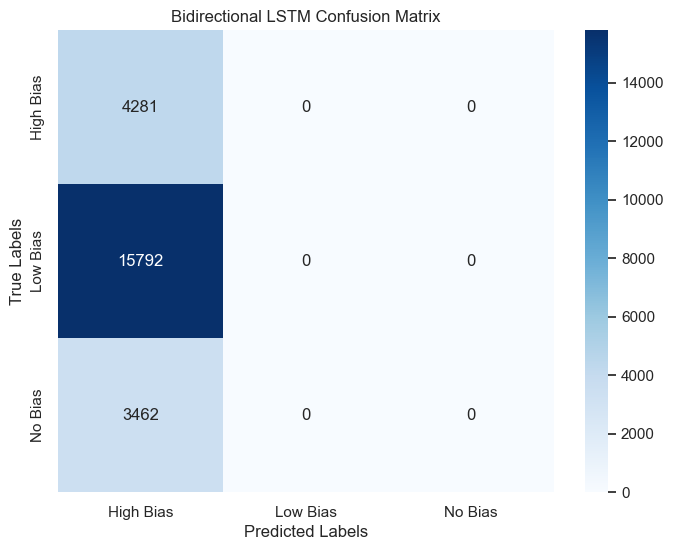

In [96]:
# Calculate the confusion matrix
blstm_cm = confusion_matrix(blstm_model_y_test_classes, blstm_y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(blstm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Bidirectional LSTM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

applying SMOTE to GRU model

In [98]:
#Import SMOTE
from imblearn.over_sampling import SMOTE

In [104]:
#Initialize SMOTE
smote = SMOTE(random_state=42)

#Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train_array, y_train_encoded)

In [105]:
#Convert y_train_smote to a DataFrame
y_train_smote_df = pd.DataFrame({'bias_category': y_train_smote})

In [107]:
y_train_smote_df.value_counts()

bias_category
0                63419
1                63419
2                63419
Name: count, dtype: int64

In [108]:
# One-hot encode y_train_smote
y_train_smote_one_hot = to_categorical(y_train_smote_df['bias_category'])

In [109]:
# Reshape the input data for GRU (assuming X_train_array has shape (samples, features))
X_train_reshaped = X_train_smote.reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

# Define the GRU model with Batch Normalization and Dropout
gru_model_smote = Sequential()
gru_model_smote.add(GRU(64, input_shape=(X_train_smote.shape[1], 1), activation='relu'))
gru_model_smote.add(BatchNormalization())
gru_model_smote.add(Dropout(0.5))
gru_model_smote.add(Dense(32, activation='relu'))
gru_model_smote.add(BatchNormalization())
gru_model_smote.add(Dropout(0.5))
gru_model_smote.add(Dense(len(class_labels), activation='softmax'))

# Compile the model with class weights
gru_model_smote.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)  # setting patience to 1

def lr_schedule(epoch):
    return 0.001 * 0.9 ** epoch

learning_rate_scheduler = LearningRateScheduler(lr_schedule)

# Train the GRU model with class weights, lowering epochs, increasing batch size
gru_model_smote.fit(X_train_reshaped, y_train_smote_one_hot, epochs=5, batch_size=250, validation_split=0.2, class_weight=class_weight_dict, callbacks=[early_stopping, learning_rate_scheduler])


Epoch 1/5
609/609 [==============================] - 214s 346ms/step - loss: 1.3262 - accuracy: 0.4139 - val_loss: 1.2520 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/5
609/609 [==============================] - 202s 332ms/step - loss: 1.3041 - accuracy: 0.4163 - val_loss: 1.3657 - val_accuracy: 7.0956e-04 - lr: 9.0000e-04


In [110]:
# Make predictions on the test data
y_pred_one_hot_gru_smote = gru_model_smote.predict(X_test_reshaped)

# Convert the predicted probabilities to class labels
y_pred_classes_gru_smote = np.argmax(y_pred_one_hot_gru_smote, axis=1)

# Convert true labels to class labels
y_test_classes_gru_smote = np.argmax(y_test_one_hot, axis=1)

# Print classification report
print(classification_report(y_test_classes_gru_smote, y_pred_classes_gru_smote, target_names=label_encoder.classes_))


736/736 [==============================] - 17s 23ms/step
              precision    recall  f1-score   support

   High Bias       0.18      1.00      0.31      4281
    Low Bias       0.00      0.00      0.00     15792
     No Bias       0.00      0.00      0.00      3462

    accuracy                           0.18     23535
   macro avg       0.06      0.33      0.10     23535
weighted avg       0.03      0.18      0.06     23535



/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/my-new-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
